In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sfm import SfM

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
config_path = os.path.join("..", "..", "..", "configs", "lab2", "config.yaml")
video_path = os.path.join("..", "..", "..", "assets", "mazeweek1.mp4")
output_path = os.path.join("..", "..", "..", "assets", "mazeweek1_frames")

In [ ]:
def split_video_to_frames(video_path, output_folder):
    os.makedirs(output_folder, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    frame_count = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        frame_filename = f"{output_folder}/frame_{frame_count:05d}.jpg"  # little hack to have them ordered
        cv2.imwrite(frame_filename, frame)
        frame_count += 1
    cap.release()
    print(f"Extracted {frame_count} frames")
    return frame_count


frame_count = split_video_to_frames(video_path, output_path)

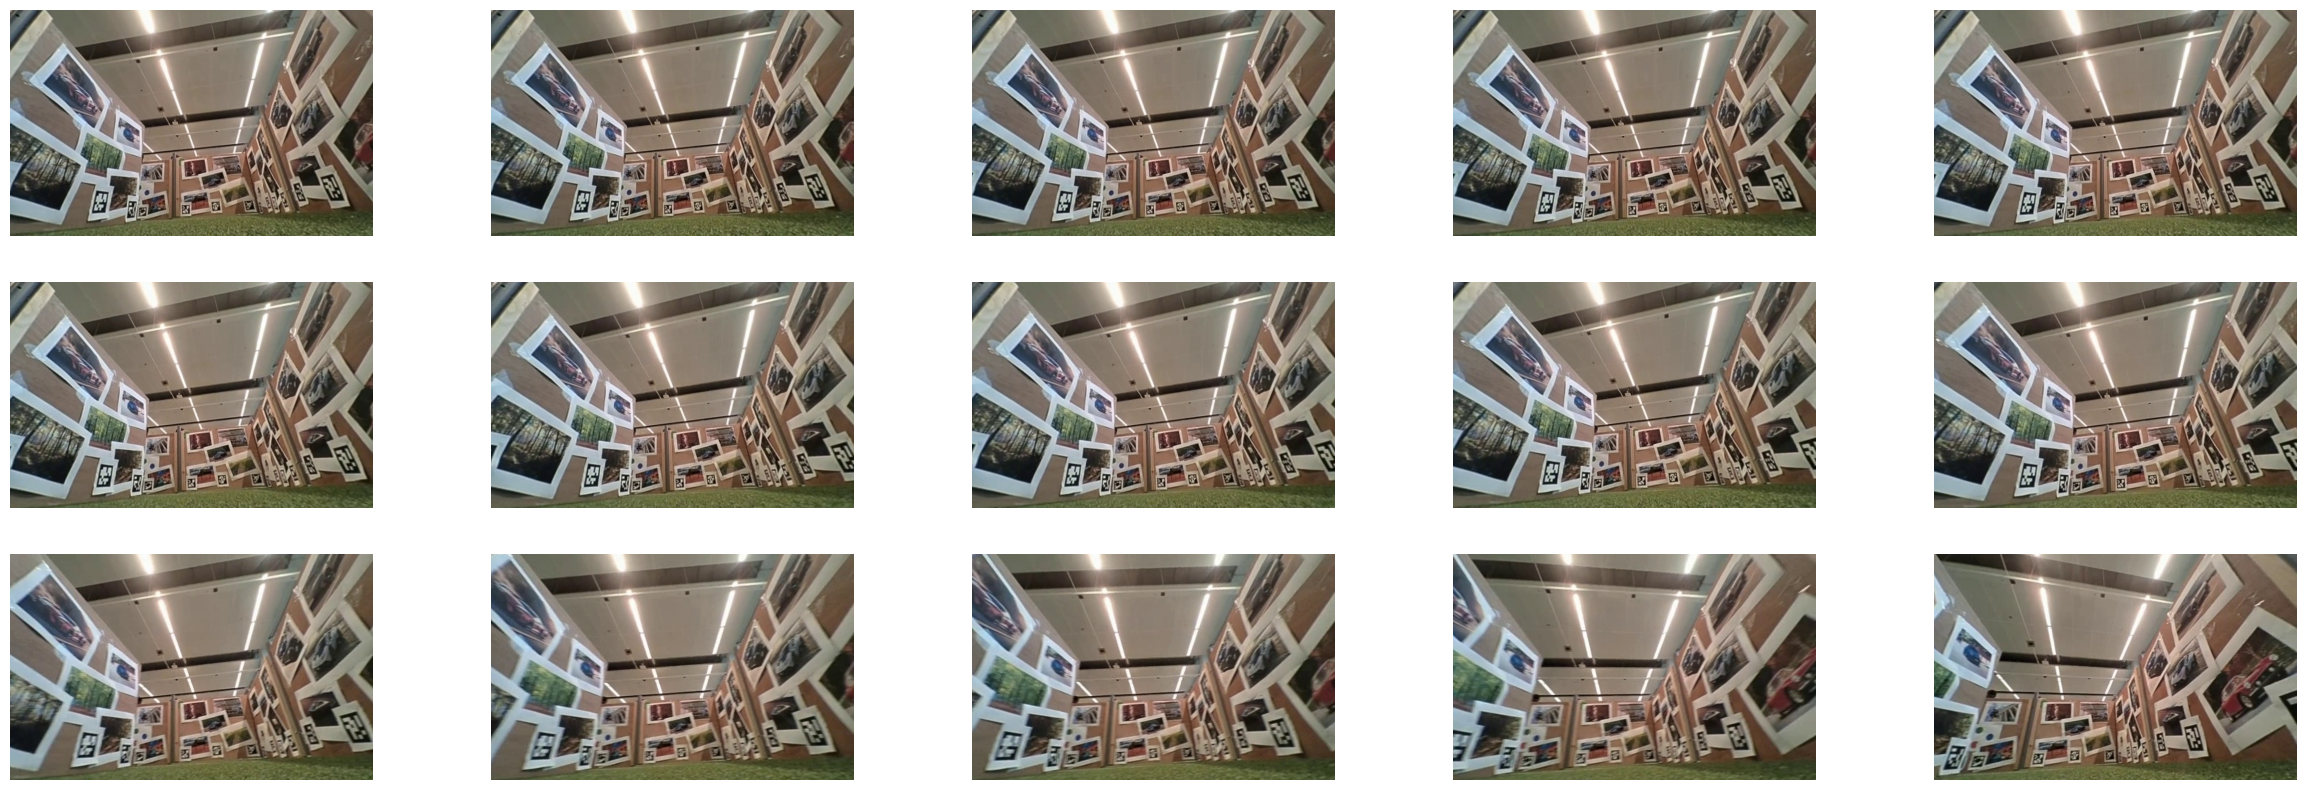

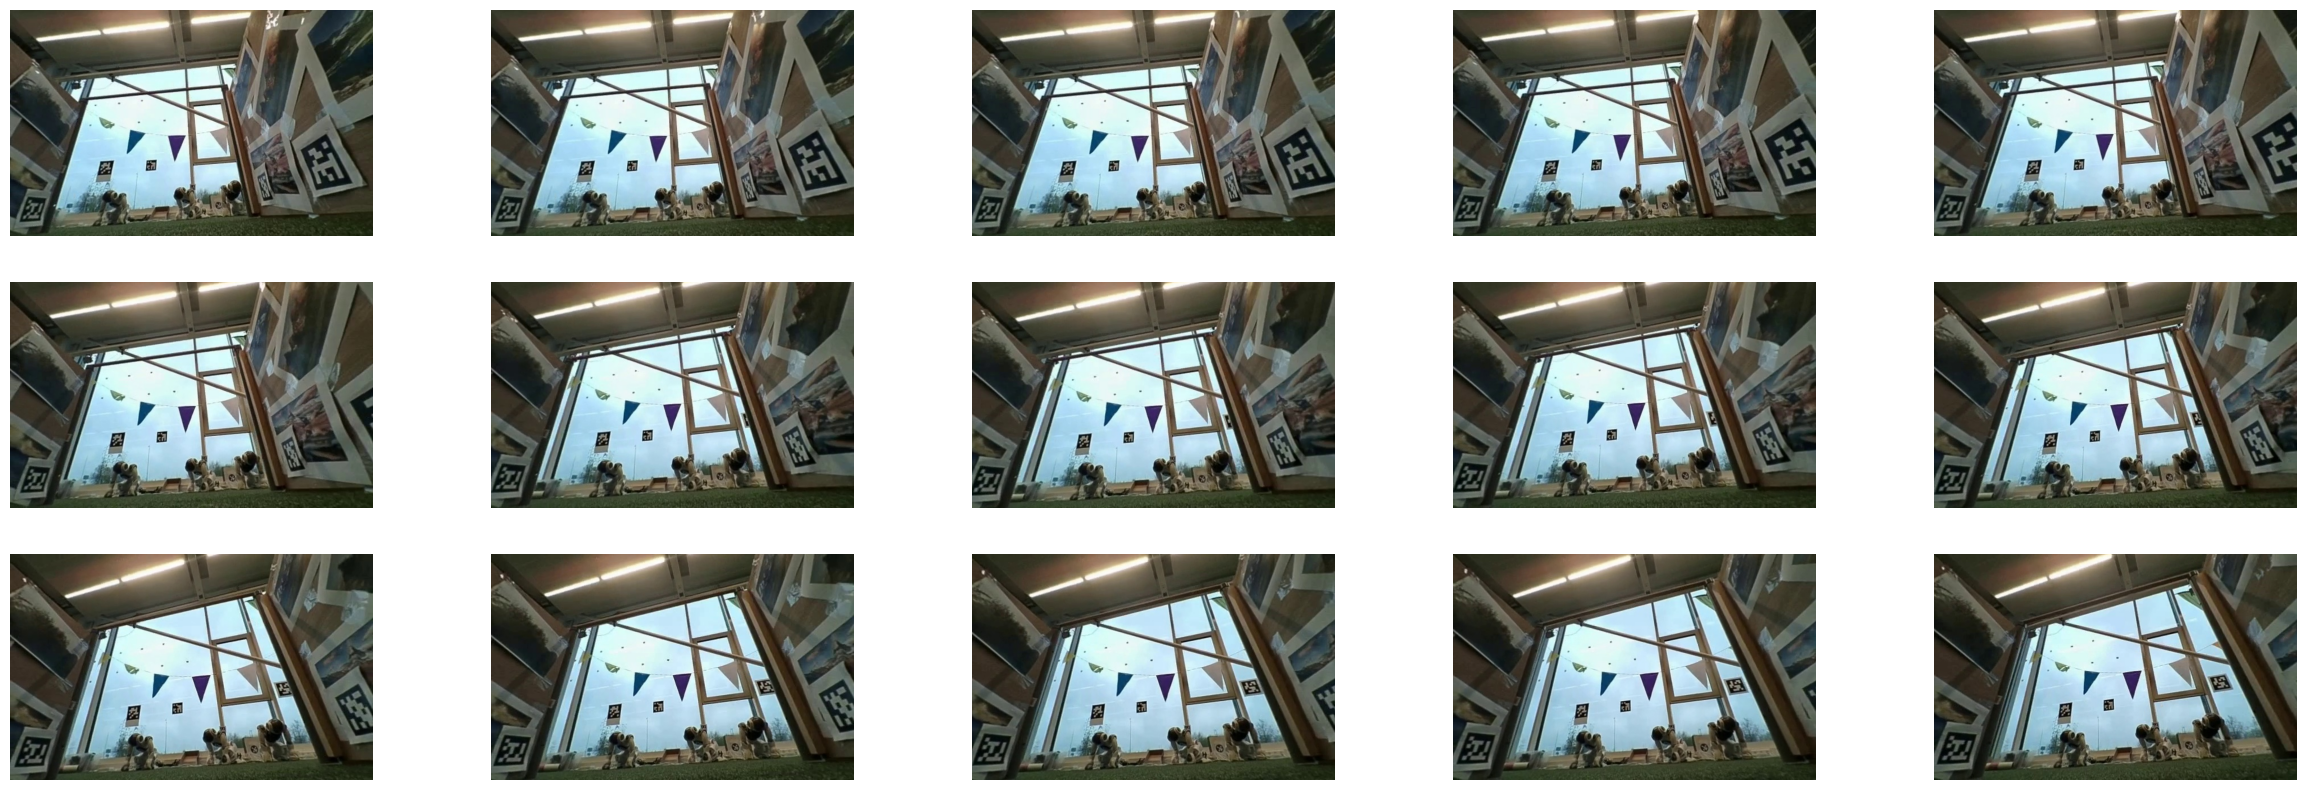

In [4]:
cutoff_first_frame = 45  # 50 seems good to start
fig, axs = plt.subplots(3, 5, figsize=(30, 10))
for i in range(cutoff_first_frame, cutoff_first_frame + 15):
    img = mpimg.imread(f"{output_path}/frame_{i:05d}.jpg")
    i -= cutoff_first_frame
    axs[i // 5, i % 5].imshow(img)
    axs[i // 5, i % 5].axis("off")
plt.show()

cutoff_last_frame = 675  # motivation for last cutoff (680 seems nice)
fig, axs = plt.subplots(3, 5, figsize=(30, 10))
for i in range(cutoff_last_frame - 15, cutoff_last_frame):
    img = mpimg.imread(f"{output_path}/frame_{i:05d}.jpg")
    axs[(i - cutoff_last_frame + 15) // 5, (i - cutoff_last_frame + 15) % 5].imshow(img)
    axs[(i - cutoff_last_frame + 15) // 5, (i - cutoff_last_frame + 15) % 5].axis("off")
plt.show()

In [9]:
image_paths = [f"{output_path}/frame_{i:05d}.jpg" for i in range(50, 70)]
SfM(image_paths=image_paths).run_sfm()

Point cloud saved to maze_point_cloud.ply


array([[0.40973514, 0.45193616, 0.00196646],
       [0.41057855, 0.45306325, 0.00185006],
       [0.40987617, 0.45168614, 0.00222176],
       ...,
       [0.42649597, 0.48752835, 0.00089109],
       [0.4270729 , 0.4881675 , 0.00088989],
       [0.4274582 , 0.4892995 , 0.00092567]], dtype=float32)

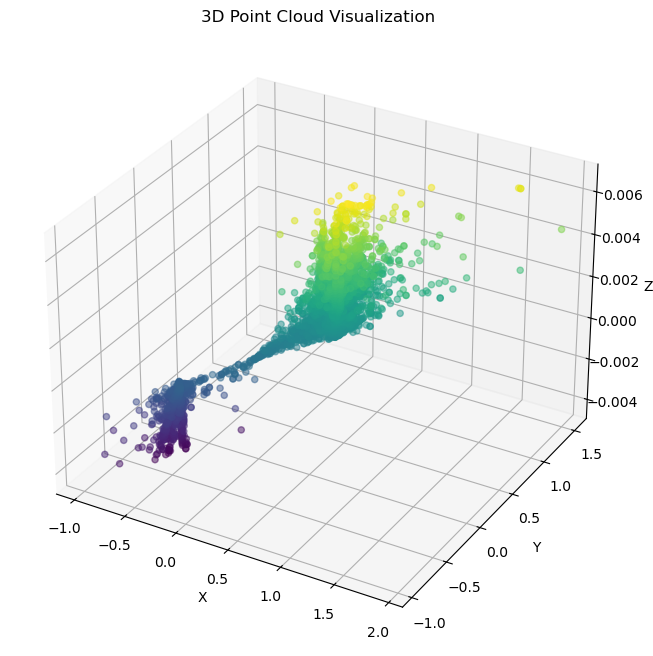

In [10]:
def visualize_ply_matplotlib(ply_path):
    # Load point cloud data
    point_cloud = np.loadtxt(ply_path, skiprows=7)

    # Create 3D scatter plot
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection="3d")

    # Plot points
    ax.scatter(
        point_cloud[:, 0],
        point_cloud[:, 1],
        point_cloud[:, 2],
        c=point_cloud[:, 2],  # Color by depth
        cmap="viridis",
        alpha=0.5,
    )

    ax.set_title("3D Point Cloud Visualization")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")

    plt.show()


visualize_ply_matplotlib("maze_point_cloud.ply")